# Introduction to writing functions in python

Hello and welcome to our workshop on writing functions in python. Today we'll go over the basic formatting for writing functions, variable scoping, control flow, and more. If this is your first day attending this workshop series, please make sure you've created an environment with the necessary packages.

## Installing/running this notebook 

You can run this notebook by uploading it to Google Colab. You can also run it on your own computer by installing Jupyter Notebook and either running jupyter in your browser or using an IDE like VSCode. 

To run this using Google Colab, go to https://colab.research.google.com/ and upload this notebook. That's it!

To run this locally, you will need to install python, anaconda, and the necessary libraries.

0. If you are on Windows, [install WSL](https://learn.microsoft.com/en-us/windows/wsl/install). Once WSL is installed, you'll have a Linux terminal available to you in Windows. You can open this terminal by typing "wsl" in the search bar and clicking the app that appears. You'll also find your Linux distribution as a mounted drive in your file explorer.
1. Install mamba, a package manager using the command line - Terminal for Mac or WSL for Windows. 
    1.1. For Mac, if you already have brew installed, install mamba using `brew install miniforge` and initialize it using `conda init zsh`. Then restart your terminal. If you don't have homebrew (i.e. the brew command doesn't exist), install brew first using `/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"`
    1.2. For Windows, download the Linux (x86_64) installer from the miniforge repository [here](https://github.com/conda-forge/miniforge) and install with `bash Miniforge3-Linux-x86_64.sh`.
2. Create a new environment using mamba with `mamba create -n pyworkshop numpy pandas matplotlib seaborn jupyter` and activate it with `conda activate pyworkshop`.
3. You can now run the jupyter notebook by typing `jupyter notebook` in the terminal. This will open a browser window with the jupyter notebook interface. You can navigate to the folder where you saved this notebook and open it.
4. Alternatively, install [VSCode](https://code.visualstudio.com/) and the Python extension. Then open this notebook in VSCode and run it with the kernel that belongs to the pyworkshop environment. [How to guide here](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Jokes

Let's start with a joke about computer programmers. Sam asks their computer programmer spouse to go get some groceries. Sam tells him, "Please go to the store to get some groceries. Buy a loaf of bread. If they have eggs, get a dozen." The spouse comes back with 13 loaves of bread. This joke is funny if you understand how computer programs evaluate commands. Below is some pseudocode that represents what the computer programmer did.

```
go to the store
def function buy_groceries():
    loaf_of_bread = 1
    if eggs:
        loaf_of_bread += 12
    return loaf_of_bread
```

This joke illustrates that what may make sense in natural language does not immediately translate to computer language. And therefore we have to be really specific when we're talking to a computer to ask it to do something.

## Thinking algorithmically

Before we get started with learning about what a function in python is, how to define them, and how to control them, let's do some non-coding exercises to get in the mindset of thinking algorithmically. One of the major hurdles to writing your own functions or computer programs is changing the way you think to match the way a computer or coding language evaluates words. Much of the difficulty is ameliorated if we practice breaking down our problems into discrete chunks. Then, taking each chunk and putting it together.

Part of thinking about code is to break down actions into logical steps, such as by writing **pseudocode**. Below is an example of pseudocode for making French-style scrambled eggs:

```
Combine eggs, salt, cream in bowl
For 30 seconds:
    whisk eggs
Set pan on stove
Turn on stove to medium
Add butter to pan
Until butter is melted:
    wait
Add eggs to pan
Until eggs are cooked:
    stir vigorously
Turn off stove
Serve
```

Note the use of conditionals and loops to describe the process. Computers need this sort of granularity to be able to execute the tasks you give it, so writing things out as pseudocode before you start writing the real code is usually very helpful. 

>**Exercise:** Write out pseudocode for getting on the bus to go to the grocery store. Let's go around and have each person write one line.

### Using boolean expressions and logical operators

A relational operator is some operator that evaluates to a truth value. For example, checking of two things are equal or identical, or checking if some item is contained in a list/grouping. These conditional expressions can then be combined with logical operators such as `and`, `or`, and `not`. They mostly work like you'd expect from natural language. However, just like with arithmetic, there's an order of operations. In python, relational operators are evaluated first, then `not`, then `and`, and finally `or`.

Let's practice using operators by filling out truth tables. Starting with a simple example, let's fill out a truth table for the following expression: `A or B`. In a truth table, we fill out all possible values for the variables in the expression and then evaluate each component of the expression.

A | B | A or B
--- | --- | ---
T | T | T
T | F | T
F | T | T
F | F | F

Let's demonstrate the order of operations by filling out a truth table for the following expression: `A and B or A and not B`.

>**Exercise:** Fill out the truth table for the above expression. We will go from left to right. 
Solution:

A | B | A and B | not B | A and not B | A and B or A and not B
--- | --- | --- | --- | --- | ---
T | T |    ?   |   ?   |      ?      |           ?
T | F |    ?    |   ?   |      ?      |           ?
F | T |    ?    |   ?   |      ?      |           ?
F | F |    ?    |   ?   |      ?      |           ?

What do you notice about the last column of the truth table representing the full expression?


### Navigating a maze

Imagine you are programming a robot to navigate a maze. You know that this maze can be navigated by following the "right hand rule", which is to always keep your right hand on the wall. The robot can move or look in four directions: up, down, left, and right. How would you give the robot instructions to navigate the maze?

>**Exercise:** Write a pseudocode for this robot navigating the maze

Here's my example pseudocode for navigating a maze using the right hand rule:

```
Look to the right:
    If there is a wall:
        Try to Move Forward
        If you can't move forward:
            Turn Left
    Else:
        Turn right
        Move Forward
```


## Basic function syntax & variable scope

Python has a variety of [built-in functions](https://docs.python.org/3/library/functions.html), but for everything else you might want to do, you will need to write your own. 

A python function declaration begins with `def` and then the function name followed by parentheses and a colon. Then, the body of the function is indented. If the function returns something, it is done through the `return` keyword at the end of the body. If a function does not have a `return`, it automatically returns `None`. 

Here's an example of a simple function that takes two arguments and returns their sum:

```python
def summation(a, b):
    total = a+b
    return total
```

One important concept to understand about functions in python is how python handles variables inside vs outside the function. This is called the scope of the variable. When a variable is defined inside a function, it is only accessible within that function. This is called a **local** variable. Run the code below as an example to illustrate how the `total` variable outside of the function is not affected by the `total` variable inside the function. Note that the arguments (a and b - the things you put in the parenthesis after the function name), are also **local**. 

In [2]:
total = 200
def summation(a, b):
    total = a+b
    return total
print(summation(1, 2))
print(total)


3
200


When you write a function, you should always be careful to only use **local** variables, which means you need to pass as an argument any variables defined outside the scope of the function, and if you want to update a variable from outside the function, you should assign the return value. Look at the code below to see a simple way to keep a running total.


In [3]:
running_total = 0
def summation(a, current_total):
    result = a + current_total
    return result

print(running_total)
running_total = summation(1, running_total)
print(running_total)
running_total = summation(10, running_total)
print(running_total)

0
1
11


Technically, it is possible to update a **global variable** (declared outside the function) from within a function, but usually there is never a good reason to do this, and it makes your code prone to bugs and harder to reuse. 

Note that forgetting to define your input arguments in your function definition can lead to confusing and hard-to-understand code. In the following example, we forgot to define `power` as an input argument to our square() function. Then, somewhere in our code, we happened to use `power` for something else. When we run our square function, it doesn't through an error as we might expect - it just uses the **global** variable we defined instead!

In [4]:
def square(x):
    return x ** power
# many lines of code...
power = 2
# many lines of code...
print(square(10))


100


>**Exercise**: As an exercise, fix the above function to take power as an argument. Note that arguments to functions can take default values. E.g., if we want a default value of b to be 2, we can define the function like:
`def function(a, b=2):`
>
> Then, if we call the function as function(2), it will interpret a = 2 and b = 2, whereas if we call it function(2, 4) it will overwrite the default value of b.
>
> When you fix the square function to take power as an argument, also set the default power to 2.

In [5]:
# Your code here
def square(x, power=2):
    return x ** power

Test your function.

In [6]:
print(square(10))
print(square(10, 3))

100
1000


>**Exercise**: Write a function that calculates the mean squared error between a set of observed and expected data points. Think about what the inputs should be and where the variables should be declared

In [7]:
# Your code here
def mse(obs, expected):
    return np.mean((obs - expected) ** 2)


In [8]:
# Test your code
predicted = np.array([1, 2, 3, 4, 5])
expected = np.array([2, 4, 1, 5, 5])
print(mse(predicted, expected)) # Expected output: 2.0


2.0


A function's arguments can be positional or keyword arguments. Positional arguments are defined by their order, while keyword arguments are defined by their name. Keyword arguments can be used to make functions more readable and to provide default values.

## Control flow

### If/else statements

The next topic we'll cover is control flow. This is the concept of controlling the order in which code is executed. The most common control flow statement is the if statement, which bifurcates the code based on some condition. Here is the basic syntax for an if/else statement:

```python
if condition:
    # code to execute if condition is true
    # this part is indented
else:
    # code to execute if condition is false
    # this part is also indented
```

Just like functions, the body of the conditional statements is indented. The `else` part if optional, but can be helpful if you want to do something different if the condition is false. The condition can be any python expression that evaluates to a `boolean` (aka True or False) value. Recall that the operators `==`, `!=`, `>`, `<`, `>=`, and `<=` are used to compare values. These generate booleans.

If we have multiple conditions that we want to evaluate, the syntax looks like this:

```python
if condition:
    # code to execute if condition is true
    # this part is indented
elif condition:
    # code to execute if some other condition is true
    # this part is also indented
else:
    # code to execute if condition is false
    # this part is also indented
```

Where `elif` is an abbreviation for 'else if'. We can have as many `elif` conditionals after an `if` as we want, though too having too many can make your code unwieldy and buggy. Importantly, the truth values for `if`, `elif` and `else` statements are checked *in sequence*. For example, in the following code:


In [9]:
x = 10
y = 5

if x > y:
    print("x is greater than y")
elif x % 2 == 0: #The modulo operator % returns the remainder of a division
    print("x is even")
else:
    print("x is less than y")

x is greater than y


We can see that the variable `x` is even, and so the `elif` conditional should evaluate to `True`...however, because the `if` conditional also evaluates to `True`, the statement will immediately end and the `elif` conditional does not get checked! Similarly, if we were to change the value of `x` to be an even number that is less than `y`, the `else` statement will instead not be evaluated. Always be careful about how you are structuring the logic of your conditional statements and be mindful of exactly what is being evaluated and in what order! Remember, the program will always do exactly what you tell it to...

Let's look more at how Python evaluates booleans. There is an important operator in Python called `in` that checks whether something exists in any **iterable** object. An object is 'iterable' if it is capable of returning its members one at at time, e.g. lists, string, keys in a dictionary, and others. So for instance, if we want to check whether an integer is present in a given list:

In [10]:
a = [1, 2, 3, 4]
print(2 == a)
# A number is not equal to the list it's in


False


In [11]:
a = [1, 2, 3, 4]
print(2 in a)
# This is how you check if a value is in a list


True


The operators `and`, `or`, and `not` can be used to combine boolean expressions. In order to evaluate the combined boolean to True, `and` requires that ALL expressions are true. For `or`, only one statement has to be true, i.e. it is NOT an exclusive or (XOR)!

In [12]:
1 in a and 4 in a

True

In [13]:
1 in a and 5 in a


False

In [14]:
1 in a or 5 in a

True

Be careful how you are structuring your logic statements. For instance, if we want to check whether one value or another value are in a list, the following code does not work:

In [15]:
# But not like this
1 or 5 in a


1

In [16]:
# You can use () to group expressions
(1 in a) and (5 in a)


False

>**Exercise**: initialize two integer variables called `x` and `y`, give them whatever values you like. Write a series of conditional statements that check the following: 
1) `x` and `y` are both even 
2) one is even and the other isn't 
3) `x` and `y` are both odd

Bonus: also check whether `x` or `y` is greater!

In [17]:
# Your code here

x = 5
y = 8

if x % 2 == 0 and y % 2 == 0:
    print("x and y are both even")
elif (x % 2 == 0 and y % 2 != 0) or (x % 2 != 0 and y % 2 == 0):
    print("one is even, one is odd")
elif x % 2 != 0 and y % 2 != 0:
    print("x and y are both odd")

one is even, one is odd


>**Bonus exercise**: write a boolean that, as before, checks whether two integers are in a list (called `b`) and evaluates to true *only if* one integer is in the list and the other is not  

In [18]:
b = [1, 2, 3, 4]
# Your code goes here:
(1 in b and 4 not in b) or (1 not in b and 4 in b)

False

### For loops

For loops are used to iterate over a sequence of values, such as a list or range of numbers. For loops are most useful when you have a set number of things you want to iterate over. In python, iterators are objects that can return the items it contains one at a time. Many common data structures can be iterated over, such as lists, dictionaries, strings, etc. More complex data structures usually have a method that makes them iterable.

Here's the syntax of a for loop:

```python
for item in iterator:
    # code to execute for each item in the sequence
    do_something(item)
```

A common thing to iterate over is a sequence of numbers. For this, it is useful to use the `range()` function which returns an iterator of the specified length. `range(4)` will return an iterator of the numbers 0, 1, 2, 3. You can combine the `range()` function with a `len()` function to iterate over the indices of a list. 

In [19]:
for i in range(5):
    print(i)


0
1
2
3
4


In [20]:
a = [1, 2, 3, 4, 5]
for i in range(len(a)):
    print(a[i])


1
2
3
4
5


If you want to directly use the items of a list, it is easier to use the `for item in list` syntax.

In [21]:
a = [1, 2, 3, 4, 5]
for item in a:
    print(item)


1
2
3
4
5


>**Exercise:** Let's combine a for loop and an if statement. In the code block below, print out all the even numbers in the list `numbers`.

In [22]:
numbers = [1, 2, 3, 4, 5]

# your code here
for number in numbers:
    if number %2 == 0:
        print(number)


2
4


>**Exercise:** Write a function called `in_list` that takes a number and a list of numbers and checks of that number already exists in the list. If it does, print "number already exists!". If it doesn't, add that number to the list. In both cases, return the list.

In [23]:
# Your code here

def in_list(value, a_list):
    if value in a_list:
        print(f"{value} is already in the list!")
    else:
        a_list.append(value)
        print(f"Adding {value} to the list!")
    return a_list


In [24]:
# Test your code
my_list = [1, 2, 3, 4, 5]
in_list(3, my_list)
in_list(30, my_list)


3 is already in the list!
Adding 30 to the list!


[1, 2, 3, 4, 5, 30]

>**Discussion:** Check your understanding of scope. Did your function modify the list that was passed to it? Or did it return a copy of the list? In what situations would we want to do one or the other?

### More advanced for loops

You can loop through both the position and the value of of an iterator by using the `enumerate()` function. This function returns a tuple of the index and the value of the item. 

In [25]:
for i, v in enumerate(["one", "two", "three"]):
    print(i, v)


0 one
1 two
2 three


If there are two lists you want to loop through in parallel, you can use the `zip()` function to pair the first item of each list, the second item of each list, etc.

In [26]:
list1 = [1, 2, 3]
list2 = ["a", "b", "c"]
for x, y in zip(list1, list2):
    print(x, y)


1 a
2 b
3 c


To loop over every pairwise combination of two lists, you would use a nested for loop. Be aware that if you are doing this for some large array, there is probably a more efficient way to do it.

In [27]:
rows = range(3)
columns = range(4)

for row in rows:
    for column in columns:
        print(row, column)


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3


### While loops

A while loop is kind of like a generalized form of a for loop. It's used to repeat code until a condition is met. Think of it as a continuous if statement where "if condition is true, do this code and then check the condition again". While loops are helpful for when you don't know exactly how many iterations you will need to go through, but do have a definite end condition for the loop. Here's the syntax of a while loop:

```python
while condition:
    # code to execute if condition is true
    # usually the condition is updated in the loop
    condition = update_condition(condition)
```

An example for using a while loop is sampling from a distribution until you get a value that meets some criteria. In the code block below, we roll a 6-sided die until we get a 6 and report how many times it took. 

In [28]:
roll = 0
count = 0
while roll != 6:
    roll = np.random.randint(1, 7)
    count += 1
print(f"It took {count} rolls to roll a 6!")


It took 16 rolls to roll a 6!


You can combine while loops with if statements as a way to change the condition and break out of the loop. Here's a rewrite of the above code that uses an if statement to change the condition.

In [29]:
condition = True
count = 0
while condition:
    if np.random.randint(1, 7) == 6:
        condition = False
        count += 1
    else:
        count += 1
print(f"It took {count} rolls to roll a 6!")


It took 1 rolls to roll a 6!


>**Exercise:** How many people can we have in a room on average before we get a collision of birthdays, assuming all birthdays are equally likely? Write a while loop that samples a random day of the year. Stop the loop when a day is repeated, representing an existing birthday. Print out the number of samples it took to get a collision.

Here is some pseudocode to help you get started:

```
initialize list of birthdays
set collision to False
while collision is False:
    make a new random birthday
    if the new birthday is in list of birthdays:
        set collision to True
    else:
        add the new birthday to the list
print("It took length_of_birthday_list people to get a collision")
```

In [30]:
# Your code here

birthdays = []
collision = False
while collision == False:
    new_birthday = np.random.randint(1, 366)
    if new_birthday in birthdays:
        collision = True
    else:
        birthdays.append(new_birthday)
print(f"Duplicate birthday found on after {len(birthdays)} people")


Duplicate birthday found on after 26 people


>**Exercise:** Using the while loop you wrote above, write a function called `birthday_sim` that repeatedly performs the while loop and returns a list of each result of the simulation. The function should take in the number of times to run the simulation as an argument. In other words, stick the while loop inside a for loop, and put the for loop inside a function. 

In [31]:
# Your code here
def birthday_sim(simulations):
    sim_list = []
    for _ in range(simulations):
        birthdays = []
        collision = False
        while collision == False:
            new_birthday = np.random.randint(1, 366)
            if new_birthday in birthdays:
                collision = True
                birthdays.append(new_birthday)
            else:
                birthdays.append(new_birthday)
        sim_list.append(len(birthdays))
    return sim_list


In [32]:
# Test your code
# On average, how many people do we need in a room to get a shared birthday?
results = birthday_sim(1000)
np.mean(results)


24.265

### More advanced while loops

You can use a while loop directly on a list. This is useful if you want to remove items from a list as you iterate over it. For this we can use the `pop()` method: when used on a list, by default (i.e. if the position isn't specified) it will remove the **last** element in the list. 

In [33]:
my_list = [1, 2, 3, 4, 5]

while my_list:
    print(my_list.pop())


5
4
3
2
1


One thing to note is lists are "truthy" if they are not empty and "falsey" if they are empty. Put another way, if we evaluate a non-empty list, it will return as 'true' while and empty list with return as 'false'...sort of like a boolean. Using the "truthiness" of an object is a common way to check if that object is empty. In a function, it can be used to check if an argument was passed when it was called. 

In [60]:
def test_function(a, b):
    if not (a and b):
        return "Please provide non-empty lists for both 'a' and 'b'"
    return len(a) + len(b)

print(test_function([2, 2, 1], [2]))
print(test_function([], [2]))


4
Please provide non-empty lists for both 'a' and 'b'


### Controlling behavior with break and continue

Sometimes you might want to exit a loop early or you might want to skip the rest of the code and start the next iteration. The `break` and `continue` statements are used for such finer grained control over your loops. The `break` statement will exit the innermost `for` or `while` loop it is in. In the below example, we use a while loop to find the first number that is divisible by 7.

In [35]:
num = 22
while True: # this would run forever if it weren't for the break statement
    num += 1
    if num % 7 == 0:
        print(f"{num} is divisible by 7")
        break
    else:
        print(f"{num} is not divisible by 7")


23 is not divisible by 7
24 is not divisible by 7
25 is not divisible by 7
26 is not divisible by 7
27 is not divisible by 7
28 is divisible by 7


Here is another example where we use the `break` statement to exit a loop. In this case, we stop when we reach zero in a random walk. 

In [36]:
position = 3
while True:

    # Randomly move either -1, or 1
    position += np.random.choice([-1, 1])

    # check position
    if position > 0:
        print(f"Current position is {position}, continue walking...")
        continue

    # If the position reaches zero, break the walk
    if position == 0:
        print("Position has reached zero, stopping the walk.")
        break


Current position is 4, continue walking...
Current position is 5, continue walking...
Current position is 4, continue walking...
Current position is 5, continue walking...
Current position is 6, continue walking...
Current position is 7, continue walking...
Current position is 6, continue walking...
Current position is 5, continue walking...
Current position is 4, continue walking...
Current position is 5, continue walking...
Current position is 6, continue walking...
Current position is 7, continue walking...
Current position is 6, continue walking...
Current position is 7, continue walking...
Current position is 6, continue walking...
Current position is 5, continue walking...
Current position is 6, continue walking...
Current position is 5, continue walking...
Current position is 6, continue walking...
Current position is 5, continue walking...
Current position is 6, continue walking...
Current position is 7, continue walking...
Current position is 8, continue walking...
Current pos

>**Exercise:** Create a function called `rand_walk` that creates a random walk of length `n` steps with starting position `start=0`. The walk should move up or down by 1 with equal probability (hint: use `np.random.choice`), but stop the walk early if the walk reaches 3 or -3. Return the list of steps taken.

In [37]:
# Your code here

def rand_walk(n, start=0):
    position = start
    walk = [position]
    for _ in range(n):
        position += np.random.choice([-1,1])
        walk.append(position)
        if position == 3 or position == -3:
            break
    return walk


In [38]:
# check your code

my_walk = rand_walk(10)
print(my_walk)


[0, 1, 0, -1, 0, -1, -2, -1, -2, -1, -2]


## Calling functions within a function

We use functions to bundle up pieces of code we want to use multiple times and to make that code portable so we can use it in different places. One of the situtations in which we may want to reuse code is within another function! In this section, we'll go over how to call functions within other functions. The basic idea is very straightforward, you simply perform a function call in the definition of another function. For example, in the code block below, we create a function that can plot any number of random walks from our original `rand_ralk` function. 

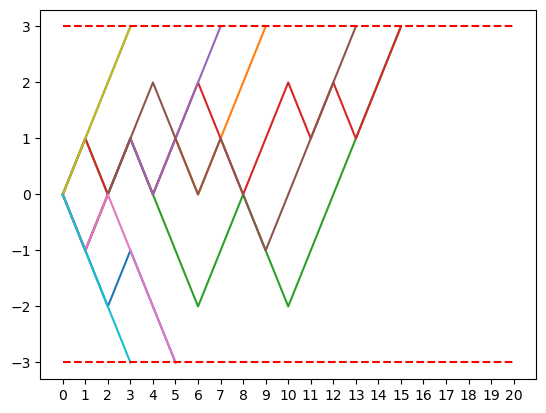

In [39]:
# We create a function to plot multiple random walks

def plot_rand_walk(num_walks, walk_length, start=0):
    # create a list to store our walks
    walks = []
    for _ in range(num_walks):
        # call the rand_walk function within this function
        walk = rand_walk(walk_length, start)
        walks.append(walk)
    fig, ax = plt.subplots()
    # use a for loop to plot each walk in our list of walks
    for walk in walks:
        ax.plot(walk)
    # Add horizontal lines at y=3 and y=-3 to indicate the break conditions/bounds of the random walk
    ax.hlines(y = 3, xmin = 0, xmax = walk_length, color = 'r', linestyle = '--', label = '3')
    ax.hlines(y = -3, xmin = 0, xmax = walk_length, color = 'r', linestyle = '--', label = '-3')
    # set x ticks to every step
    ax.set_xticks(range(walk_length+1))

# Now we can use a single line to plot as many random walks as we want
plot_rand_walk(10, 20)


## Lambda functions

Lambda functions are small, anonymous (unnamed) functions usually used as a one-off function. It's like calling a function within a function but even smaller and informal. You can use lambda functions to do a quick calculation or transformation before passing the result as an argument to another function. Here's the syntax of a lambda function:

```python
lambda arguments: expression
```

As you can see, the `lambda` keyword takes the place of `def function_name():` and the arguments that would normally go inside parentheses are just listed after the `lambda` keyword. Also, the expression is not indented and there is no need for a `return` statement. 

>**Exercise:** Convert the following regular functions into lambda functions:

```python
def square(x):
    return x**2
```

```python
def is_odd(x):
    return x % 2 != 0
```

```python
def concat_strings(a, b):
    return a + " " + b
```

In [40]:
# Your code here

# square
lambda x: x**2

# is_odd
lambda x: x % 2 != 0

# concat_strings
lambda a, b: a + " " + b


<function __main__.<lambda>(a, b)>

Lambda functions are commonly used within other functions such as the `filter()` and `map()` functions. Here's an example of using a lambda function to filter only the odd numbers from a list.

In [41]:
numbers = [1, 4, 5, 8, 9, 12, 15]
list(filter(lambda x: x % 2 != 0, numbers))


[1, 5, 9, 15]

Here is an example of using a lambda function to concatenate two lists of strings element-wise.

In [42]:
list1 = ["a", "b", "c"]
list2 = ["apple", "banana", "cherry"]
list(map(lambda x, y: x + " " + y, list1, list2))




['a apple', 'b banana', 'c cherry']

## Bonus: List Comprehension

While some people use lamdba functions a lot, other people find them a little hard to use and understand. Many things that you can do with a lambda function you can also do with a particularly Pythonic construct known as list comprehension. 

List comprehension is kind of like a condensed loop. Here is an example, that we'll break down:
`[x + ": " + y for x, y in zip(list1,list2)]`

We can see something that looks like a for loop in there: `for x,y in zip(list1, list2)`. We know this already, and we know that this is a loop that interates over `zip(list1, list2)`, and puts paired elements in `x, y` for each iteration. 

The other part, `x + ": " + y`, is just string concatenation. We might therefore write this out like:
```python
output = []
for x, y in zip(list1, list2):
    new_elem = x + ": " + y
    output.append(new_elem)
```

Note that list comprehension is just compressing this. You can read it as `do this for item in list`, where in this case `do this` = `x + ": " + y`, `item` = `x, y`, and `list` = `zip(list1, list2)

In [43]:
print([odd for odd in numbers if odd % 2 != 0])
print([x + ": " + y for x, y in zip(list1, list2)])

[1, 5, 9, 15]
['a: apple', 'b: banana', 'c: cherry']


List comprehensions are useful if you want to do a simple operation on every element of a list (or other iterable) and return a new list. List comprehensions are also faster/more efficient than using a for loop. 

>**Exercise:** Convert the following expressions into list comprehensions:

```python
my_pets = ["fluffy", "max", "rosie", "sam"]
my_pets_caps = []
for pet in my_pets:
    my_pets_caps.append(pet.capitalize())
```

```python
my_pets = ["fluffy", "max", "rosie", "sam"]
num_chars = []
for pet in my_pets:
    num_chars.append(len(pet))
```


In [44]:
# Your code here
my_pets = ["fluffy", "max", "rosie", "sam"] # list of pet names
my_pets_caps = [pet.capitalize() for pet in my_pets]

In [45]:
# Your code here
my_pets = ["fluffy", "max", "rosie", "sam"] # list of pet names
num_chars = [len(pet) for pet in my_pets]

Getting into more advanced list comprehensions, you can also use conditionals in order to filter the list or only perform operations on certain elements of a list. Here's an example of a list comprehension that only returns pet names that are three characters or less. 

```python
my_pets = ["fluffy", "max", "rosie", "sam"]
short_names = [pet for pet in my_pets if len(pet) <= 3]
```

Notice how the conditional is at the end of the list comprehension. The syntax is `do this for item in list if this condition`. For reference, here's the for loop version of the above code:

```python
my_pets = ["fluffy", "max", "rosie", "sam"]
short_names = []
for pet in my_pets:
    if len(pet) <= 3:
        short_names.append(pet)
```

>**Exercise:** Convert the following expressions into list comprehensions:

```python
my_numbers = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
positive_even_numbers = []
for num in my_numbers:
    if num > 0 and num % 2 == 0:
        positive_even_numbers.append(num)
```


```python
my_numbers = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
squared_and_even_numbers = []
for num in my_numbers:
    if num**2 % 2 == 0:
        squared_even_numbers.append(num**2)
```


In [46]:
# Your code here
my_numbers = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4] # list of numbers
positive_even_numbers = [num for num in my_numbers if num > 0 and num % 2 == 0]

In [47]:
# Your code here
my_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # list of numbers
squared_and_even_numbers = [num ** 2 for num in my_numbers if num**2 % 2 == 0]

>**Exercise:** Revisit last session's scrabble score function. Write a *dictionary* comprehension that does the same thing as that function.

```python
def scrabble_score(word):
    scrabble_letter_values = {
    'A': 1, 'B': 2, 'C': 3, 'D': 1, 'E': 1, 'F': 4, 'G': 2, 'H': 4, 'I': 1,
    'J': 8, 'K': 5, 'L': 1, 'M': 3, 'N': 1, 'O': 1, 'P': 3, 'Q': 10, 'R': 1,
    'S': 1, 'T': 1, 'U': 1, 'V': 4, 'W': 4, 'X': 8, 'Y': 4, 'Z': 10
    }
    score = 0
    for letter in word.upper():
        score += scrabble_letter_values.get(letter, 0)
    return score
```

In [48]:
scrabble_letter_values = {
    'A': 1, 'B': 2, 'C': 3, 'D': 1, 'E': 1, 'F': 4, 'G': 2, 'H': 4, 'I': 1,
    'J': 8, 'K': 5, 'L': 1, 'M': 3, 'N': 1, 'O': 1, 'P': 3, 'Q': 10, 'R': 1,
    'S': 1, 'T': 1, 'U': 1, 'V': 4, 'W': 4, 'X': 8, 'Y': 4, 'Z': 10
    }
my_word = "HELLO"

# Your code here
sum([scrabble_letter_values[letter] for letter in my_word])

8

## Using functions to do math and plot things

Functions can be useful for performing mathematical operations. Any equation can be turned into a function by replacing the variables from a mathematical with python objects that are passed through the function as arguments. Here is an example of a function that calculates the area of a circle given the radius. Unlike variables in mathematical formulas, the python objects in your function should have expressive names, so avoid naming your objects things like x, y, r, etc. This will help improve readability. 

>**Exercise:** Write a function that calculates the volume of a sphere given the radius. You can use the `np.pi` constant for the value of pi.

In [49]:
# Your code here

def vol_sphere(radius):
    return (4/3) * np.pi * radius ** 3


In [50]:
# check your work

print(vol_sphere(1)) # Expected output: 4.1887902047863905


4.1887902047863905


Let's use our function to plot how the volume of a sphere changes with its radius. To do this, we create a numpy array of 100 numbers evenly spaced between 0.1 and 10 using the `np.linspace()` function. We then use that array as the input to the `vol_sphere()` function. Note how even though we didn't do anything special to volume calculation function, it operates just as well on single number as it does on numpy arrays. This is because numpy arrays are designed to **vectorize** functions across the elements of an array.

[Text(0.5, 0, 'Radius'), Text(0, 0.5, 'Volume')]

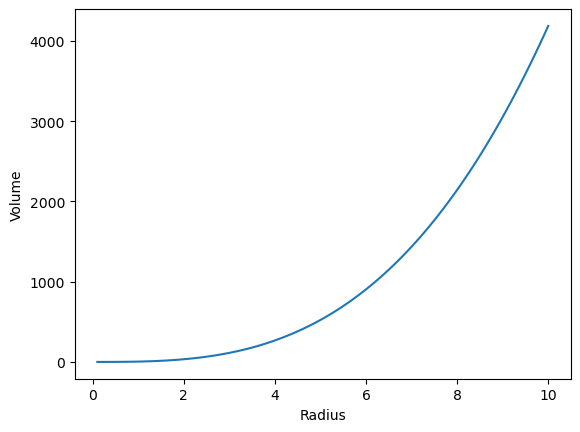

In [51]:
radii = np.linspace(0.1, 10, 100)

fig, ax = plt.subplots()
volumes = vol_sphere(radii)
ax.plot(radii, volumes)
ax.set(xlabel="Radius", ylabel="Volume")


>**Exercise:** Write a function that finds the intersection of two lines given the slope and y-intercept of each line. The function should return the x and y coordinates of the intersection. If the lines are parallel, the function should print "lines are parallel" and return `None`. 

In [52]:
# Your code here
def intersection(y_intercept1, slope1, y_intercept2, slope2):
    if slope1 == slope2:
        print("Lines are parallel")
        return None
    x = (y_intercept2 - y_intercept1) / (slope1 - slope2)
    y = slope1 * x + y_intercept1
    return (x, y)

In [53]:
# check your work
print(intersection(1, 2, 2, 2)) # Expected output: None
print(intersection(0, 1, 1, -1)) # Expected 0.5, 0.5


Lines are parallel
None
(0.5, 0.5)


Here is another example of converting a mathematical expression into a funciton and then plotting it. Below is the logistic growth equation, expressed as $$P(t)=\frac{K}{1+\frac{K-P_0}{P_0}e^{-rt}}$$ 
where 

$P_0$ = initial population size

$K$ = carrying capacity

$r$ = growth rate

$t$ = time 

In the code block below, the `logistic_growth` function takes a time point, an initial population size, a carrying capacity, and a growth rate (as a percentage). And it will return an array of the population size at each time point. 

In [54]:
def logistic_growth(time, initial, carrying_capacity, rate):
    return carrying_capacity / (1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * time))


We can then create a dataframe to plot this function by initalizing a time array using `np.arange()` to make a time vector that goes from 1 to 999. We also set the other constants. Then, we create a dataframe to store the simulated data. Finally, we plot with seaborn.

[(0.0, 1000.0), (0.0, 2100.0)]

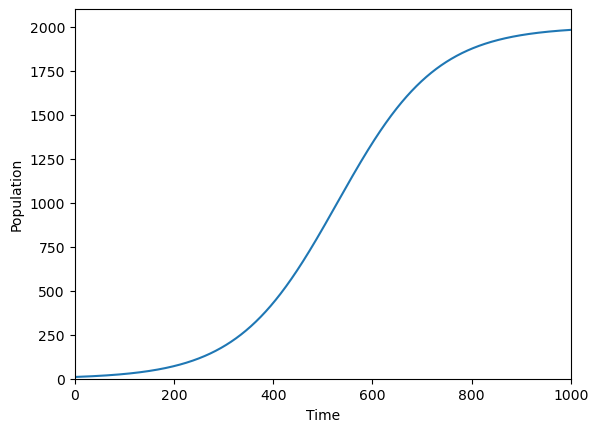

In [55]:
time_points = np.arange(1, 1000)
initial = 10
carrying_capacity = 2000
rate = .01

df = pd.DataFrame({"Time": time_points, "Population": logistic_growth(time_points, initial, carrying_capacity, rate)})
g = sns.lineplot(df, x = "Time", y = "Population")
g.set(xlim=(0, 1000), ylim = (0, 2100))


>**Exercise:** Create a function called `dPdt` that calculates the rate of an enzyme reaction based on Michaelis-Menten kinetics. The equation for reactions rate $v$ is below:
$$v=\frac{dP}{dt}=\frac{V_{max} a}{K_m+a}$$
where

$v$= rate of change of product dp/dt

$V_{max}$= Max rate of the system given an enzyme concentration

$K_m$= Rate at which rate is half of Vmax

$a$= concentration of substrate

In [56]:
# Your code here

def dPdt(Vmax, Km, a):
    return (Vmax * a) / (Km + a)


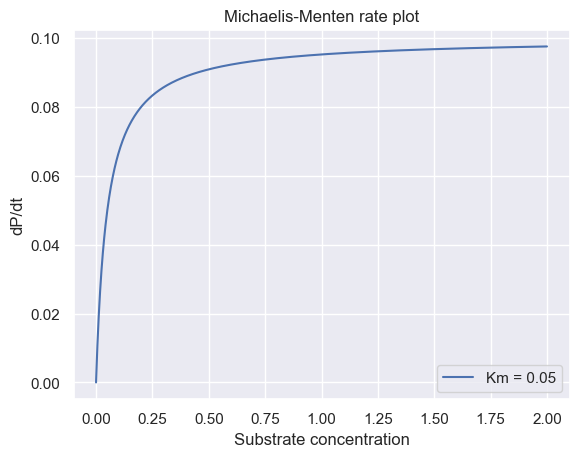

In [57]:
# check your work
sns.set_theme()
def mmplot():
    fig, ax = plt.subplots()
    a = np.linspace(0, 2, 1000)
    Vmax = .1
    Km = .05
    ax.plot(a, dPdt(Vmax, Km, a), label = f"Km = {Km}")
    ax.set(xlabel = "Substrate concentration", ylabel = "dP/dt", title = "Michaelis-Menten rate plot")
    ax.legend(loc = "lower right")

mmplot()


>**Exercise:** Using the `dPdt` function, create another function called `michaelis_menten_plot` takes a list of Km values and plots each one as a line like on the above plot. X axis should be substrate concentration, y axis should be dPdt. There should be a line corresponding to each Km value. Feel free to use the constant values of the previous plot. 

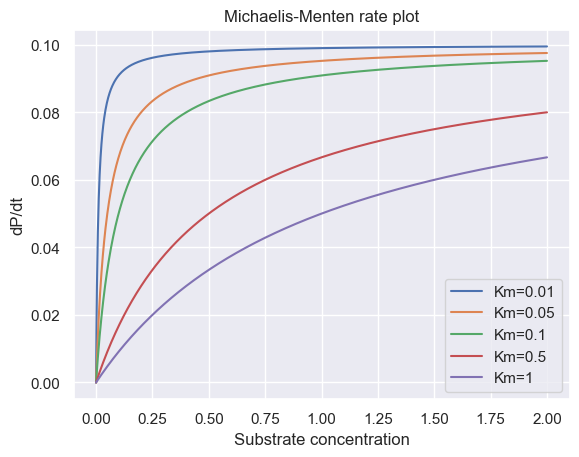

In [58]:
def michaelis_menten_plot(Km): # keep
    fig, ax = plt.subplots() # keep
    a = np.linspace(0, 2, 1000) # keep
    Vmax = .1 # keep
    for k in Km:
        ax.plot(a, dPdt(Vmax, k, a), label = f"Km={k}")
    ax.set(xlabel = "Substrate concentration", ylabel = "dP/dt", title = "Michaelis-Menten rate plot") # keep
    ax.legend() # keep

# check your work
michaelis_menten_plot([0.01, 0.05, 0.1, .5, 1])


## General tips for writing functions

**Write lots of functions! Functionalize everything!**

There are many reasons to write functions, even if you think you might only use it once in your notebook or workflow. Using functions in your code improves the readability of the code, because rather than puzzle through many lines trying to interpret what was going on, you can just read the function name/description and understand what happened. It also improves readability by allowing the reader to focus on the important parts of the code rather than functions that may perform rote tasks. 

Functions make your code more modular and reproducible. By breaking down the analysis into discrete chunks, you can easily swap out functions to test things or move sections of code around because functions are very portable. 

Functions also make your code more testable. When you encounter a bug or an unexpected outcome, you can more easily trace the source of the problem if you have functions that are well-documented and do one thing. Think of it like mixing smaller batches of reagents that you use at a time rather than one big container. 

**Document your functions**

The first step towards having a readable and well-documented function is to choose a descriptive name for it. The name should use a verb like "plot" or "calculate". Try and follow some consistent naming conventions with regard to capitalization and underscores. It'll be easier to remember what your functions are called if you don't mix up conventions like "plot" and "Plot" or "plot_this" and "plotThis". For more guidance, see the [python style guide](https://peps.python.org/pep-0008/#naming-conventions). 

The second step when writing functions: it is good practice to annotate it with what it does. That way, when future you or someone else reads it, the function's useage is immediately clear. You can annotate functions with a triple quote at the beginning of a function body, which is called a **docstring**. Typical contents of a docstring are:

* one sentence describing the usage
* list of all parameters and what type they should be
* what the function returns

See below:

```python
def fibonacci(n):
    """
    Calculate the nth number in the fibonacci sequence
    Input: n, an integer
    Returns: the nth number in the fibonacci sequence, an integer
    """
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
```

Lastly, you are encouraged to write comments in your code. Comments in python are prefixed with a `#` and a good rule of thumb is to write a comment for every chunk of code that does something specific, or if it is not obvious why you had to write code that way. These comments will primarily benefit yourself for when you go back to your code and ask yourself "why did I do it this way?". It's good practice to have comments exist on their own line rather than in-line with your code. 

**Functions should do ONE thing**

Functions are meant to do one thing, just like a sentence is meant to express a complete thought. If you bundle your entire analysis into a single function, it's akin to writing a run-on sentence by abusing colons, semi-colons, etc. It might be correct and it might run, but it will be hard to read and also hard to debug. Make liberal use of calling functions within functions and making your code modular. 